In [48]:
# Import necessary libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import seaborn as sns

In [49]:
# Load the data
ground_truths_path = 'ground_truths/ground_truths.csv'  # Replace with your local path
predicted_times_path = 'ground_truths/predicted_times.csv'  # Replace with your local path

ground_truths = pd.read_csv(ground_truths_path)
predicted_times = pd.read_csv(predicted_times_path)

# Merge ground truths with predictions based on the image name
comparison = pd.merge(predicted_times, ground_truths, 
                      left_on='Image Name', right_on='Watch', how='inner')


In [50]:
comparison

,Image Name,Predicted Time,Watch,Time
0,watch1_rotated_-270,10:10:00,watch1_rotated_-270,10:10:30
1,watch1_rotated_-90,10:10:00,watch1_rotated_-90,10:10:30
2,watch1_rotated_180,10:10:00,watch1_rotated_180,10:10:30
3,watch2_rotated_-270,Detection Failed,watch2_rotated_-270,11:15:12
4,watch2_rotated_-90,Detection Failed,watch2_rotated_-90,11:15:12
5,watch2_rotated_180,11:15:11,watch2_rotated_180,11:15:12
6,watch3_rotated_-270,10:10:26,watch3_rotated_-270,10:10:25
7,watch3_rotated_-90,10:10:25,watch3_rotated_-90,10:10:25
8,watch3_rotated_180,10:10:26,watch3_rotated_180,10:10:25
9,watch4_rotated_-270,10:11:00,watch4_rotated_-270,10:11:48


In [57]:
# Define a function to classify as successful or failed based on the "Predicted Time"
def classify_prediction(predicted_time):
    if isinstance(predicted_time, str) and ("failed" in predicted_time.lower() or "detection failed" in predicted_time.lower()):
        return "Failed"
    else:
        return "Successful"

# Apply the classification function to the 'Predicted Time' column
comparison['Prediction Status'] = comparison['Predicted Time'].apply(classify_prediction)

# Calculate the number of successful and failed predictions
successful_predictions = (comparison['Prediction Status'] == "Successful").sum()
failed_predictions = (comparison['Prediction Status'] == "Failed").sum()

# Calculate the ratio of successful to failed detections
total_predictions = len(comparison)
success_ratio = successful_predictions / total_predictions * 100
failure_ratio = failed_predictions / total_predictions * 100

# Output the results
print(f"Total Predictions: {total_predictions}")
print(f"Successful Predictions: {successful_predictions} ({success_ratio:.2f}%)")
print(f"Failed Predictions: {failed_predictions} ({failure_ratio:.2f}%)")


Total Predictions: 15
Successful Predictions: 13 (86.67%)
Failed Predictions: 2 (13.33%)


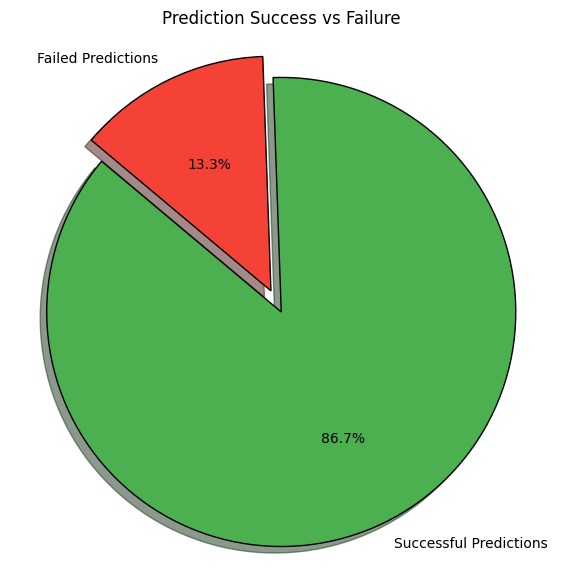

In [58]:
import matplotlib.pyplot as plt

# Data for the pie chart
labels = ['Successful Predictions', 'Failed Predictions']
sizes = [successful_predictions, failed_predictions]
colors = ['#4CAF50', '#F44336']  # Green for successful, red for failed
explode = (0.1, 0)  # Slightly "explode" the successful slice to highlight it

# Plotting the pizza chart
plt.figure(figsize=(7, 7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, 
        shadow=True, wedgeprops={'edgecolor': 'black'})
plt.title('Prediction Success vs Failure')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()


In [51]:
# Convert times to seconds for plotting
def time_to_seconds(time_str):
    """Convert time string (HH:MM:SS) to total seconds."""
    try:
        h, m, s = map(int, time_str.split(':'))
        return h * 3600 + m * 60 + s
    except:
        return None

# Add conversions for seconds, minutes, and hours
comparison['Ground Truth Seconds'] = comparison['Time'].apply(time_to_seconds)
comparison['Predicted Seconds'] = comparison['Predicted Time'].apply(time_to_seconds)

# Convert seconds to minutes and hours
comparison['Ground Truth Minutes'] = comparison['Ground Truth Seconds'] / 60
comparison['Predicted Minutes'] = comparison['Predicted Seconds'] / 60

comparison['Ground Truth Hours'] = comparison['Ground Truth Seconds'] / 3600
comparison['Predicted Hours'] = comparison['Predicted Seconds'] / 3600

# Filter out invalid rows
valid_comparison = comparison.dropna(subset=['Ground Truth Seconds', 'Predicted Seconds'])

# Calculate time differences (absolute value) for seconds, minutes, and hours
valid_comparison['Time Difference (Seconds)'] = (valid_comparison['Predicted Seconds'] - valid_comparison['Ground Truth Seconds']).abs()
valid_comparison['Time Difference (Minutes)'] = (valid_comparison['Predicted Minutes'] - valid_comparison['Ground Truth Minutes']).abs()
valid_comparison['Time Difference (Hours)'] = (valid_comparison['Predicted Hours'] - valid_comparison['Ground Truth Hours']).abs()



C:\Users\pedro\AppData\Local\Temp\ipykernel_19544\2009726499.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_comparison['Time Difference (Seconds)'] = (valid_comparison['Predicted Seconds'] - valid_comparison['Ground Truth Seconds']).abs()
C:\Users\pedro\AppData\Local\Temp\ipykernel_19544\2009726499.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_comparison['Time Difference (Minutes)'] = (valid_comparison['Predicted Minutes'] - valid_comparison['Ground Truth Minutes']).abs()
C:\Users\p

In [52]:
valid_comparison

,Image Name,Predicted Time,Watch,Time,Ground Truth Seconds,Predicted Seconds,Ground Truth Minutes,Predicted Minutes,Ground Truth Hours,Predicted Hours,Time Difference (Seconds),Time Difference (Minutes),Time Difference (Hours)
0,watch1_rotated_-270,10:10:00,watch1_rotated_-270,10:10:30,36630,36600.0,610.500000,610.000000,10.175000,10.166667,30.0,0.500000,0.008333
1,watch1_rotated_-90,10:10:00,watch1_rotated_-90,10:10:30,36630,36600.0,610.500000,610.000000,10.175000,10.166667,30.0,0.500000,0.008333
2,watch1_rotated_180,10:10:00,watch1_rotated_180,10:10:30,36630,36600.0,610.500000,610.000000,10.175000,10.166667,30.0,0.500000,0.008333
5,watch2_rotated_180,11:15:11,watch2_rotated_180,11:15:12,40512,40511.0,675.200000,675.183333,11.253333,11.253056,1.0,0.016667,0.000278
6,watch3_rotated_-270,10:10:26,watch3_rotated_-270,10:10:25,36625,36626.0,610.416667,610.433333,10.173611,10.173889,1.0,0.016667,0.000278
7,watch3_rotated_-90,10:10:25,watch3_rotated_-90,10:10:25,36625,36625.0,610.416667,610.416667,10.173611,10.173611,0.0,0.000000,0.000000
8,watch3_rotated_180,10:10:26,watch3_rotated_180,10:10:25,36625,36626.0,610.416667,610.433333,10.173611,10.173889,1.0,0.016667,0.000278
9,watch4_rotated_-270,10:11:00,watch4_rotated_-270,10:11:48,36708,36660.0,611.800000,611.000000,10.196667,10.183333,48.0,0.800000,0.013333
10,watch4_rotated_-90,10:11:00,watch4_rotated_-90,10:11:48,36708,36660.0,611.800000,611.000000,10.196667,10.183333,48.0,0.800000,0.013333
11,watch4_rotated_180,10:10:44,watch4_rotated_180,10:11:48,36708,36644.0,611.800000,610.733333,10.196667,10.178889,64.0,1.066667,0.017778


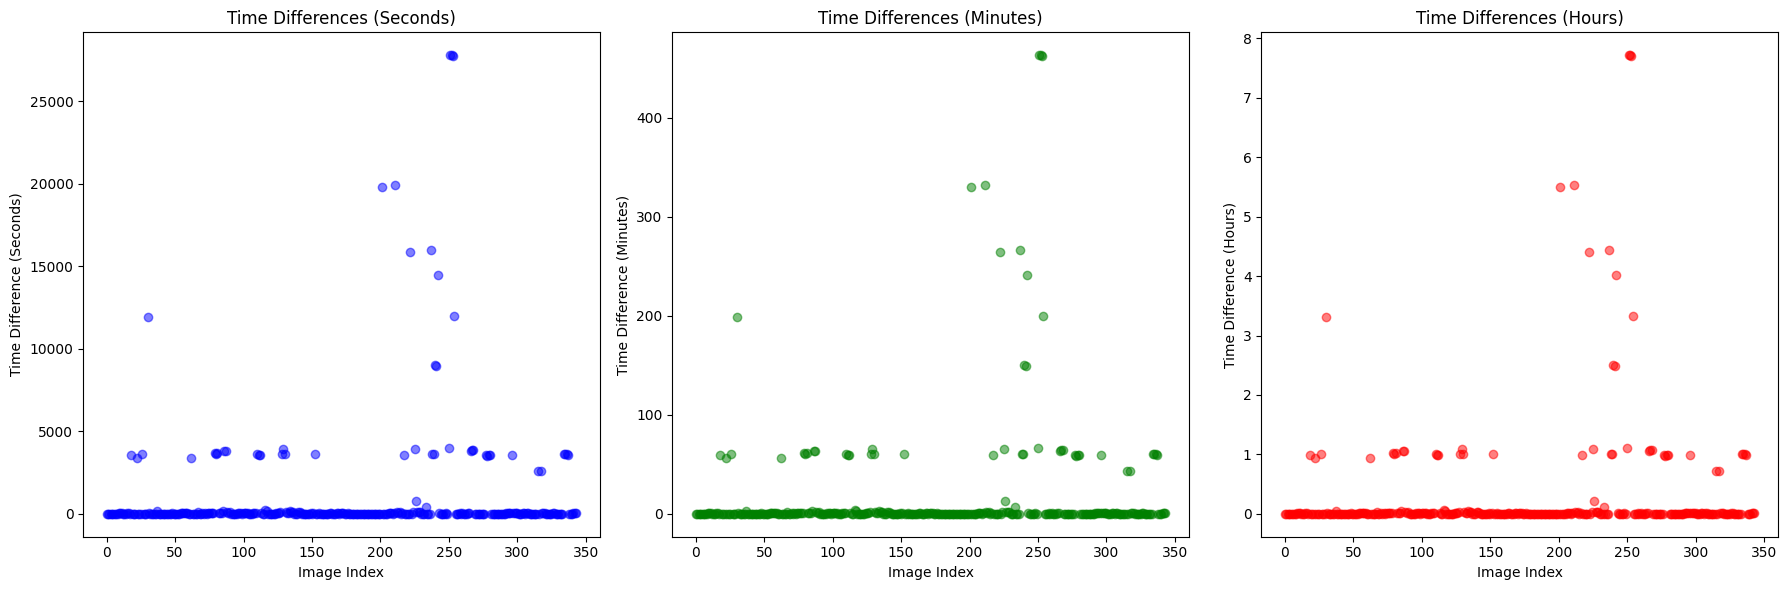

In [38]:
# Plot the time differences for seconds, minutes, and hours
plt.figure(figsize=(18, 6))

# Scatter plot for seconds
plt.subplot(1, 3, 1)
plt.scatter(valid_comparison.index, valid_comparison['Time Difference (Seconds)'], color='blue', alpha=0.5)
plt.xlabel('Image Index')
plt.ylabel('Time Difference (Seconds)')
plt.title('Time Differences (Seconds)')

# Scatter plot for minutes
plt.subplot(1, 3, 2)
plt.scatter(valid_comparison.index, valid_comparison['Time Difference (Minutes)'], color='green', alpha=0.5)
plt.xlabel('Image Index')
plt.ylabel('Time Difference (Minutes)')
plt.title('Time Differences (Minutes)')

# Scatter plot for hours
plt.subplot(1, 3, 3)
plt.scatter(valid_comparison.index, valid_comparison['Time Difference (Hours)'], color='red', alpha=0.5)
plt.xlabel('Image Index')
plt.ylabel('Time Difference (Hours)')
plt.title('Time Differences (Hours)')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


Accuracy (Seconds): 73.84%
Accuracy (Minutes): 73.84%
Accuracy (Hours): 73.84%


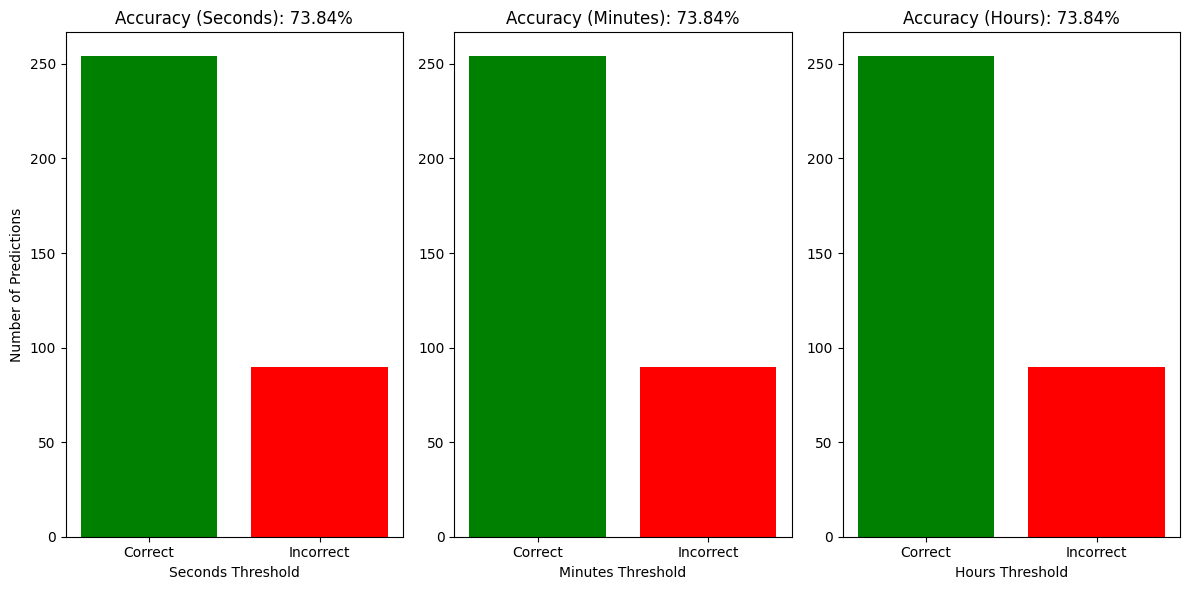

In [47]:
# Define thresholds for each unit
threshold_seconds = 60  
threshold_minutes = 1   
threshold_hours = 0.0167  # approximately 1 minute in hours

# Calculate correct predictions for each unit
correct_seconds = valid_comparison['Time Difference (Seconds)'] <= threshold_seconds
correct_minutes = valid_comparison['Time Difference (Minutes)'] <= threshold_minutes
correct_hours = valid_comparison['Time Difference (Hours)'] <= threshold_hours

# Calculate accuracy percentages
accuracy_seconds = (correct_seconds.sum() / len(valid_comparison)) * 100
accuracy_minutes = (correct_minutes.sum() / len(valid_comparison)) * 100
accuracy_hours = (correct_hours.sum() / len(valid_comparison)) * 100

# Print the accuracy percentages
print(f"Accuracy (Seconds): {accuracy_seconds:.2f}%")
print(f"Accuracy (Minutes): {accuracy_minutes:.2f}%")
print(f"Accuracy (Hours): {accuracy_hours:.2f}%")

# Bar plot for correct vs incorrect predictions for each unit
plt.figure(figsize=(12, 6))

# Seconds
plt.subplot(1, 3, 1)
plt.bar(['Correct', 'Incorrect'], [correct_seconds.sum(), (~correct_seconds).sum()], color=['green', 'red'])
plt.title(f'Accuracy (Seconds): {accuracy_seconds:.2f}%')
plt.ylabel('Number of Predictions')
plt.xlabel('Seconds Threshold')

# Minutes
plt.subplot(1, 3, 2)
plt.bar(['Correct', 'Incorrect'], [correct_minutes.sum(), (~correct_minutes).sum()], color=['green', 'red'])
plt.title(f'Accuracy (Minutes): {accuracy_minutes:.2f}%')
plt.xlabel('Minutes Threshold')

# Hours
plt.subplot(1, 3, 3)
plt.bar(['Correct', 'Incorrect'], [correct_hours.sum(), (~correct_hours).sum()], color=['green', 'red'])
plt.title(f'Accuracy (Hours): {accuracy_hours:.2f}%')
plt.xlabel('Hours Threshold')

plt.tight_layout()
plt.show()


# Standard Deviation 

In [40]:
# Calculate the standard deviation of the time differences
std_dev_seconds = valid_comparison['Time Difference (Seconds)'].std()
std_dev_minutes = valid_comparison['Time Difference (Minutes)'].std()
std_dev_hours = valid_comparison['Time Difference (Hours)'].std()

# Print the standard deviations
print(f"Standard Deviation of Time Differences:")
print(f"  Seconds: {std_dev_seconds:.2f} seconds")
print(f"  Minutes: {std_dev_minutes:.2f} minutes")
print(f"  Hours: {std_dev_hours:.4f} hours")  # Higher precision for small hour values


Standard Deviation of Time Differences:
  Seconds: 3570.07 seconds
  Minutes: 59.50 minutes
  Hours: 0.9917 hours


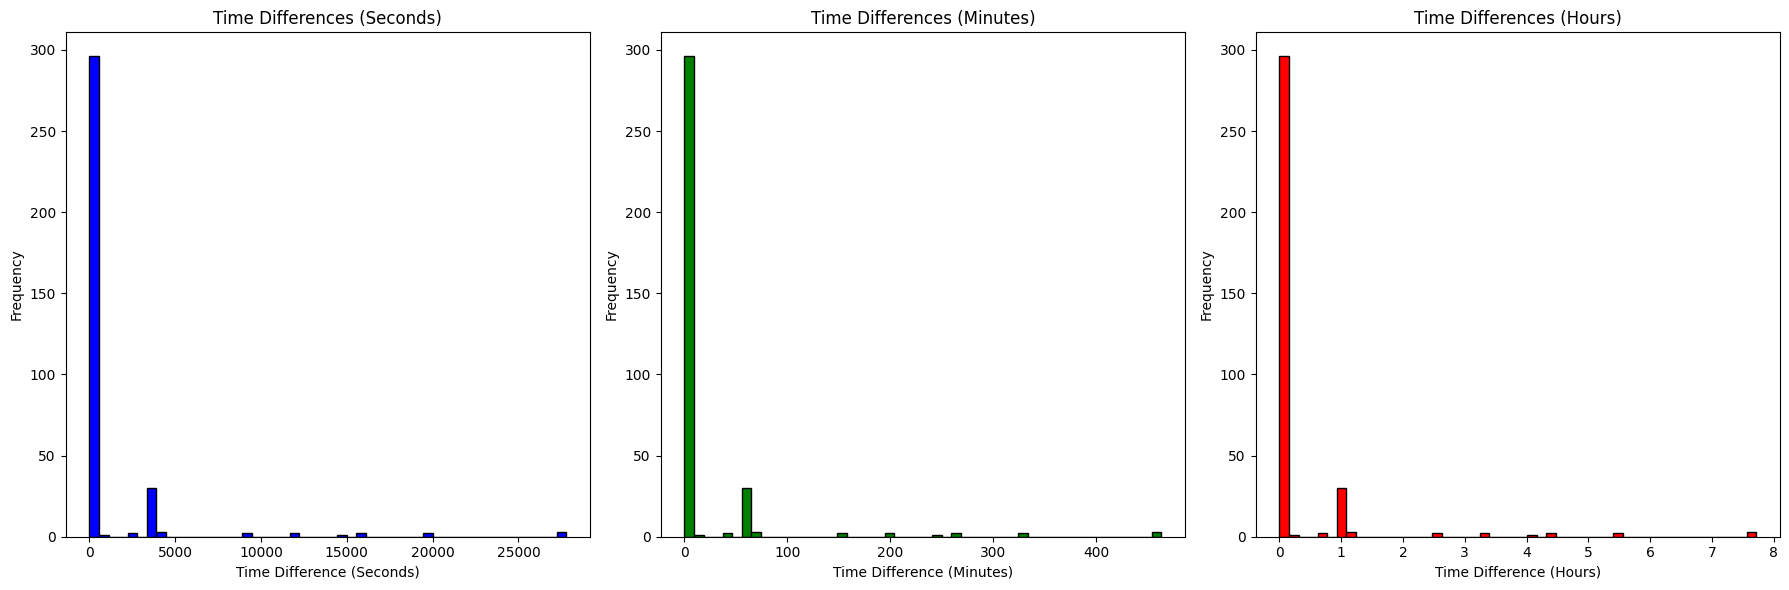

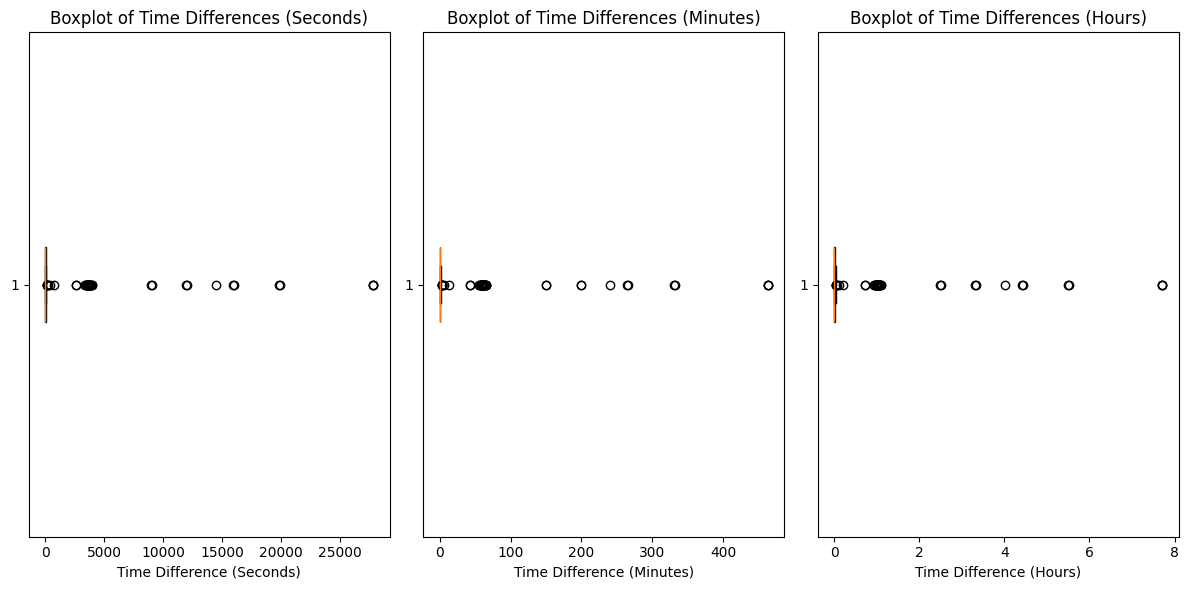

In [41]:
import matplotlib.pyplot as plt

# Plot histograms for seconds, minutes, and hours
plt.figure(figsize=(18, 6))

# Histogram for seconds
plt.subplot(1, 3, 1)
plt.hist(valid_comparison['Time Difference (Seconds)'], bins=50, color='blue', edgecolor='black')
plt.title('Time Differences (Seconds)')
plt.xlabel('Time Difference (Seconds)')
plt.ylabel('Frequency')

# Histogram for minutes
plt.subplot(1, 3, 2)
plt.hist(valid_comparison['Time Difference (Minutes)'], bins=50, color='green', edgecolor='black')
plt.title('Time Differences (Minutes)')
plt.xlabel('Time Difference (Minutes)')
plt.ylabel('Frequency')

# Histogram for hours
plt.subplot(1, 3, 3)
plt.hist(valid_comparison['Time Difference (Hours)'], bins=50, color='red', edgecolor='black')
plt.title('Time Differences (Hours)')
plt.xlabel('Time Difference (Hours)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Plot boxplots for seconds, minutes, and hours
plt.figure(figsize=(12, 6))

# Boxplot for seconds
plt.subplot(1, 3, 1)
plt.boxplot(valid_comparison['Time Difference (Seconds)'], vert=False, patch_artist=True, boxprops=dict(facecolor='blue', color='black'))
plt.title('Boxplot of Time Differences (Seconds)')
plt.xlabel('Time Difference (Seconds)')

# Boxplot for minutes
plt.subplot(1, 3, 2)
plt.boxplot(valid_comparison['Time Difference (Minutes)'], vert=False, patch_artist=True, boxprops=dict(facecolor='green', color='black'))
plt.title('Boxplot of Time Differences (Minutes)')
plt.xlabel('Time Difference (Minutes)')

# Boxplot for hours
plt.subplot(1, 3, 3)
plt.boxplot(valid_comparison['Time Difference (Hours)'], vert=False, patch_artist=True, boxprops=dict(facecolor='red', color='black'))
plt.title('Boxplot of Time Differences (Hours)')
plt.xlabel('Time Difference (Hours)')

plt.tight_layout()
plt.show()


In [42]:
# Define outlier thresholds
outlier_threshold_seconds = 3600  # in seconds
outlier_threshold_minutes = outlier_threshold_seconds / 60  # in minutes
outlier_threshold_hours = outlier_threshold_seconds / 3600  # in hours

# Filter out time differences above the threshold for each unit
filtered_comparison_seconds = valid_comparison[valid_comparison['Time Difference (Seconds)'].abs() <= outlier_threshold_seconds]
filtered_comparison_minutes = valid_comparison[valid_comparison['Time Difference (Minutes)'].abs() <= outlier_threshold_minutes]
filtered_comparison_hours = valid_comparison[valid_comparison['Time Difference (Hours)'].abs() <= outlier_threshold_hours]

# Recalculate the standard deviation without outliers
filtered_std_dev_seconds = filtered_comparison_seconds['Time Difference (Seconds)'].std()
filtered_std_dev_minutes = filtered_comparison_minutes['Time Difference (Minutes)'].std()
filtered_std_dev_hours = filtered_comparison_hours['Time Difference (Hours)'].std()

# Print the recalculated standard deviations
print("Standard Deviation without Outliers:")
print(f"  Seconds: {filtered_std_dev_seconds:.2f} seconds")
print(f"  Minutes: {filtered_std_dev_minutes:.2f} minutes")
print(f"  Hours: {filtered_std_dev_hours:.4f} hours")



Standard Deviation without Outliers:
  Seconds: 895.28 seconds
  Minutes: 14.92 minutes
  Hours: 0.2436 hours


# Mean Absolute Error

In [43]:
import numpy as np

def mean_absolute_error_with_threshold(y_true, y_pred, threshold=None):
    """
    Calculate the Mean Absolute Error (MAE) with an optional threshold for outliers.
    
    Args:
    - y_true: Array-like of ground truth values.
    - y_pred: Array-like of predicted values.
    - threshold: Optional; exclude errors above this threshold.
    
    Returns:
    - Mean absolute error, or None if no data remains after thresholding.
    """
    # Calculate the absolute errors
    errors = np.abs(y_true - y_pred)
    
    # Apply threshold to filter out outliers if provided
    if threshold is not None:
        errors = errors[errors <= threshold]
    
    # Return the mean of the errors, or None if no valid errors remain
    return np.mean(errors) if len(errors) > 0 else None

# Threshold values for each unit
threshold_seconds = 3600  # in seconds
threshold_minutes = threshold_seconds / 60  # in minutes
threshold_hours = threshold_seconds / 3600  # in hours

# Calculate MAE for each unit
mae_seconds = mean_absolute_error_with_threshold(
    valid_comparison['Ground Truth Seconds'], 
    valid_comparison['Predicted Seconds'], 
    threshold=threshold_seconds
)

mae_minutes = mean_absolute_error_with_threshold(
    valid_comparison['Ground Truth Minutes'], 
    valid_comparison['Predicted Minutes'], 
    threshold=threshold_minutes
)

mae_hours = mean_absolute_error_with_threshold(
    valid_comparison['Ground Truth Hours'], 
    valid_comparison['Predicted Hours'], 
    threshold=threshold_hours
)

# Print results
print(f"Mean Absolute Error (MAE) with threshold:")
print(f"  Seconds: {mae_seconds:.2f} seconds")
print(f"  Minutes: {mae_minutes:.2f} minutes")
print(f"  Hours: {mae_hours:.4f} hours")



Mean Absolute Error (MAE) with threshold:
  Seconds: 277.10 seconds
  Minutes: 4.62 minutes
  Hours: 0.0741 hours


# Bias

In [44]:
# Calculate the bias (mean error) for each unit
bias_seconds = (valid_comparison['Predicted Seconds'] - valid_comparison['Ground Truth Seconds']).mean()
bias_minutes = (valid_comparison['Predicted Minutes'] - valid_comparison['Ground Truth Minutes']).mean()
bias_hours = (valid_comparison['Predicted Hours'] - valid_comparison['Ground Truth Hours']).mean()

# Print the biases
print("Bias (Mean Error):")
print(f"  Seconds: {bias_seconds:.2f} seconds")
print(f"  Minutes: {bias_minutes:.2f} minutes")
print(f"  Hours: {bias_hours:.4f} hours")


Bias (Mean Error):
  Seconds: -5.16 seconds
  Minutes: -0.09 minutes
  Hours: -0.0014 hours


# Error Distribution

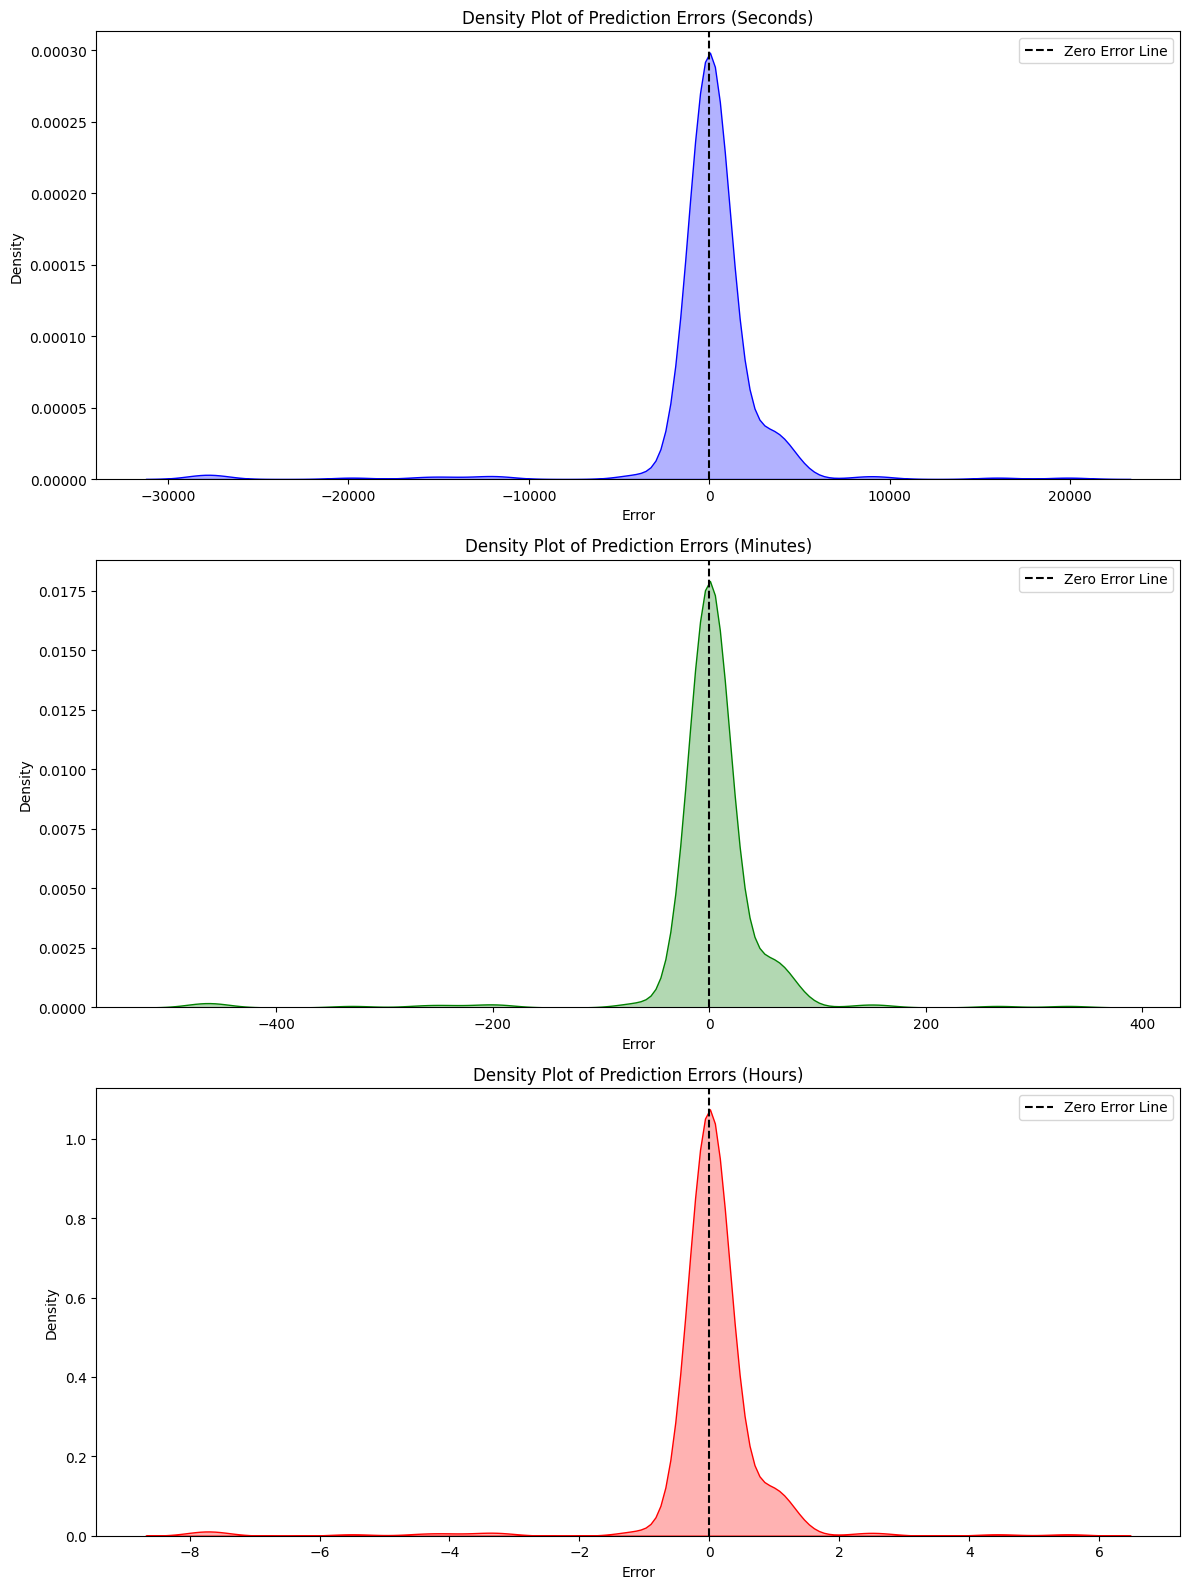

In [45]:
# Calculate prediction errors for each time unit
valid_comparison['Error (Seconds)'] = valid_comparison['Predicted Seconds'] - valid_comparison['Ground Truth Seconds']
valid_comparison['Error (Minutes)'] = valid_comparison['Predicted Minutes'] - valid_comparison['Ground Truth Minutes']
valid_comparison['Error (Hours)'] = valid_comparison['Predicted Hours'] - valid_comparison['Ground Truth Hours']

# Individual density plots for better visualization
fig, axes = plt.subplots(3, 1, figsize=(12, 16), sharex=False)

# Seconds
sns.kdeplot(valid_comparison['Error (Seconds)'], color='blue', fill=True, alpha=0.3, ax=axes[0])
axes[0].set_title('Density Plot of Prediction Errors (Seconds)')
axes[0].axvline(0, color='black', linestyle='--', label='Zero Error Line')
axes[0].legend()

# Minutes
sns.kdeplot(valid_comparison['Error (Minutes)'], color='green', fill=True, alpha=0.3, ax=axes[1])
axes[1].set_title('Density Plot of Prediction Errors (Minutes)')
axes[1].axvline(0, color='black', linestyle='--', label='Zero Error Line')
axes[1].legend()

# Hours
sns.kdeplot(valid_comparison['Error (Hours)'], color='red', fill=True, alpha=0.3, ax=axes[2])
axes[2].set_title('Density Plot of Prediction Errors (Hours)')
axes[2].axvline(0, color='black', linestyle='--', label='Zero Error Line')
axes[2].legend()

# Add labels
for ax in axes:
    ax.set_xlabel('Error')
    ax.set_ylabel('Density')

plt.tight_layout()
plt.show()




# Correlation Coefficient

In [46]:
# Calculate Pearson correlation coefficients for each unit
correlation_seconds = valid_comparison['Ground Truth Seconds'].corr(valid_comparison['Predicted Seconds'])
correlation_minutes = valid_comparison['Ground Truth Minutes'].corr(valid_comparison['Predicted Minutes'])
correlation_hours = valid_comparison['Ground Truth Hours'].corr(valid_comparison['Predicted Hours'])

# Print the correlation coefficients
print(f"Correlation Coefficient:")
print(f"  Seconds: {correlation_seconds:.4f}")
print(f"  Minutes: {correlation_minutes:.4f}")
print(f"  Hours: {correlation_hours:.4f}")


Correlation Coefficient:
  Seconds: 0.8520
  Minutes: 0.8520
  Hours: 0.8520
